In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
plt.rcParams['figure.figsize'] = (20, 15)
bkgd = stats.norm.rvs(scale=3, size=1000000)
signal = stats.uniform.rvs(scale=20, size=1000000)

<ipython-input-4-b9acb7122666>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

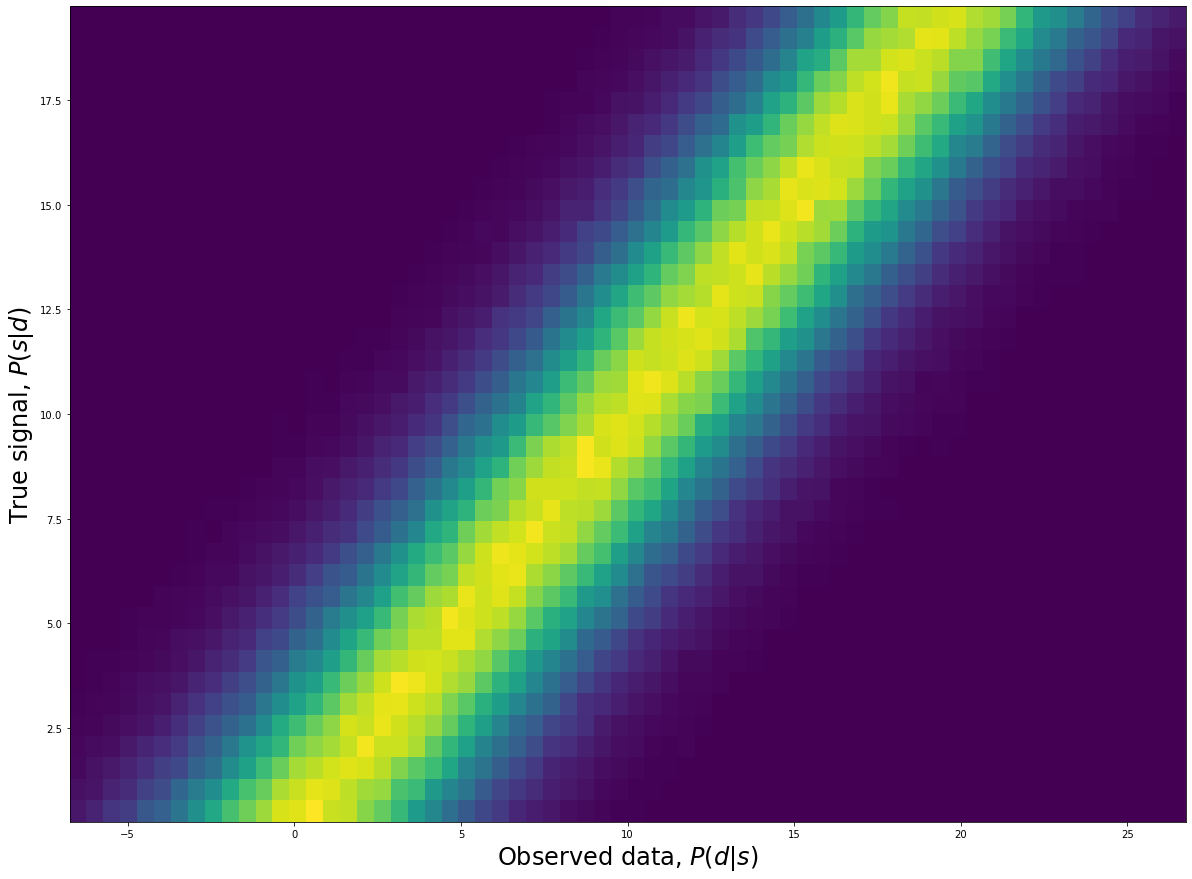

In [4]:
data = bkgd + signal
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Picking an arbitrary true signal value, ($P(s)$ = 10.0), what is the probability distribution of the observed data point ($P(d|s)$)?

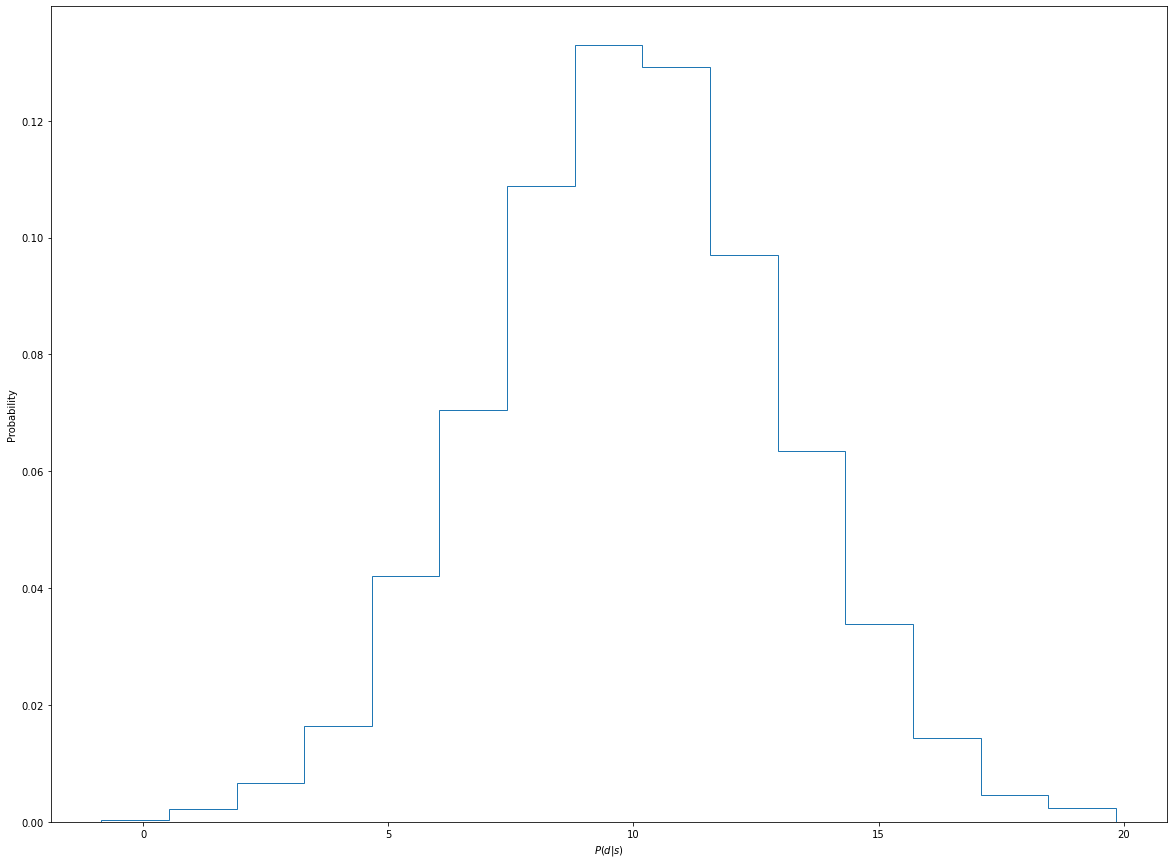

In [6]:
p_s = 10
p_d_s = [data[x] for x in range(len(data)) if abs(signal[x] - p_s) < 0.05]
plt.hist(p_d_s, 15, density=True, histtype='step')
plt.ylabel('Probability')
plt.xlabel('$P(d|s)$')
plt.show()

The plot shown above is representative of the probabilities of a true signal being 10 at various observational values. So for example, if an observation is made with a value of 10, there is a probability of ~0.13 of the true signal being 10. The x axis is a horizontal slice of the 2d histogram above where $P(s|d)$ = 10.

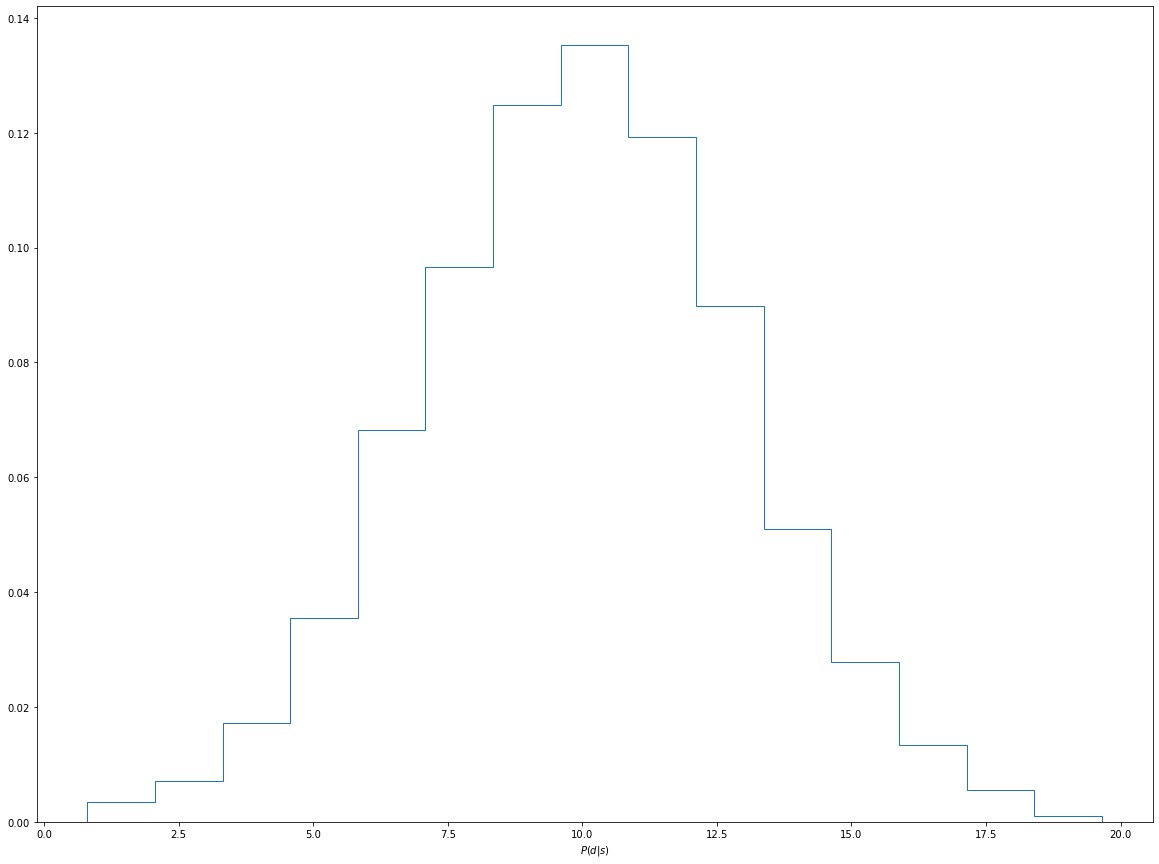

In [8]:
p_d = 10
p_s_d = [signal[x] for x in range(len(data)) if (abs(data[x] - 10)) < 0.05]
plt.hist(p_s_d, 15, density=True,histtype='step')
plt.xlabel('$P(d|s)$')
plt.show()

The plot above is very similar to the one before, however this time, we plot the probability of a true signal value given a particular observed value (in this case 10). So for example, if we take a measurement of 10, the probability of the true signal being 10 is actually only ~0.13. The x axis is representative of a vertical slice of the 2d histogram above with a $P(d|s)$ value of 10.

Next, looks look at the distributions when the background is centered about 5.

<ipython-input-9-f0b3b19152fe>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

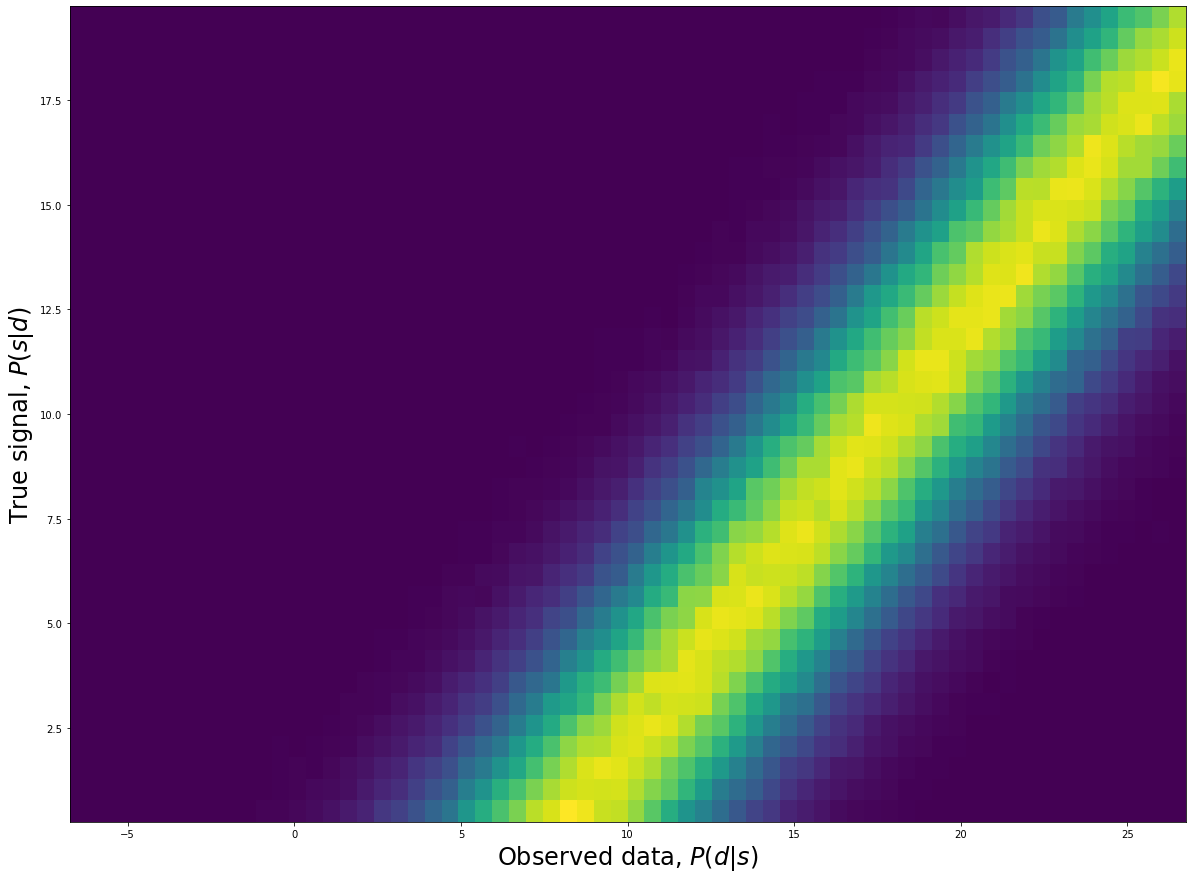

In [9]:
bckd = stats.norm.rvs(loc=8, scale=3, size=1000000)
data_2 = bckd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data_2,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

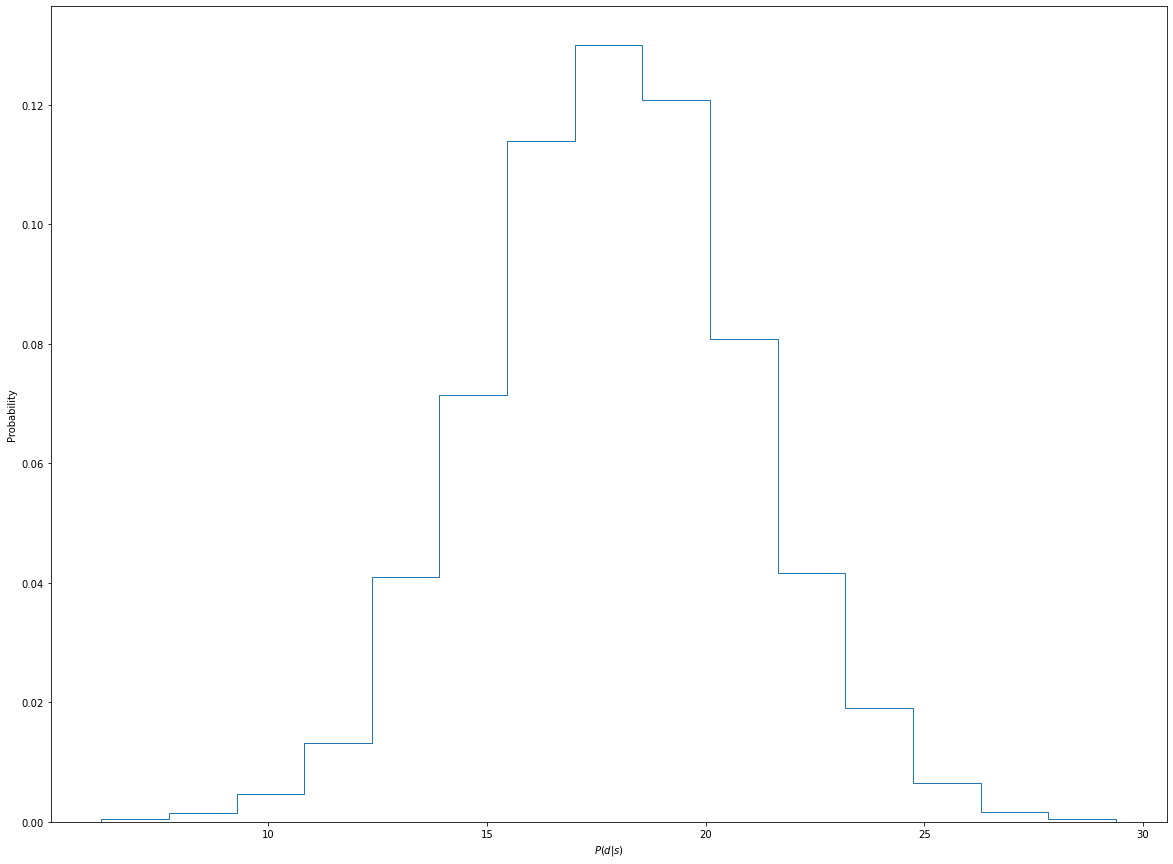

In [10]:
p_s = 10
p_d_s = [data_2[x] for x in range(len(data)) if abs(signal[x] - p_s) < 0.05]
plt.hist(p_d_s, 15, density=True, histtype='step')
plt.ylabel('Probability')
plt.xlabel('$P(d|s)$')
plt.show()


Here, you can see that the distribution $P(d|s)$ is shifted positively by ~8. This makes sense as the location of the generated background has shifted 8, indicating that for any  given true signal point, the distribution, based on the results we found before, will have a mean of the true signal plus the shift.

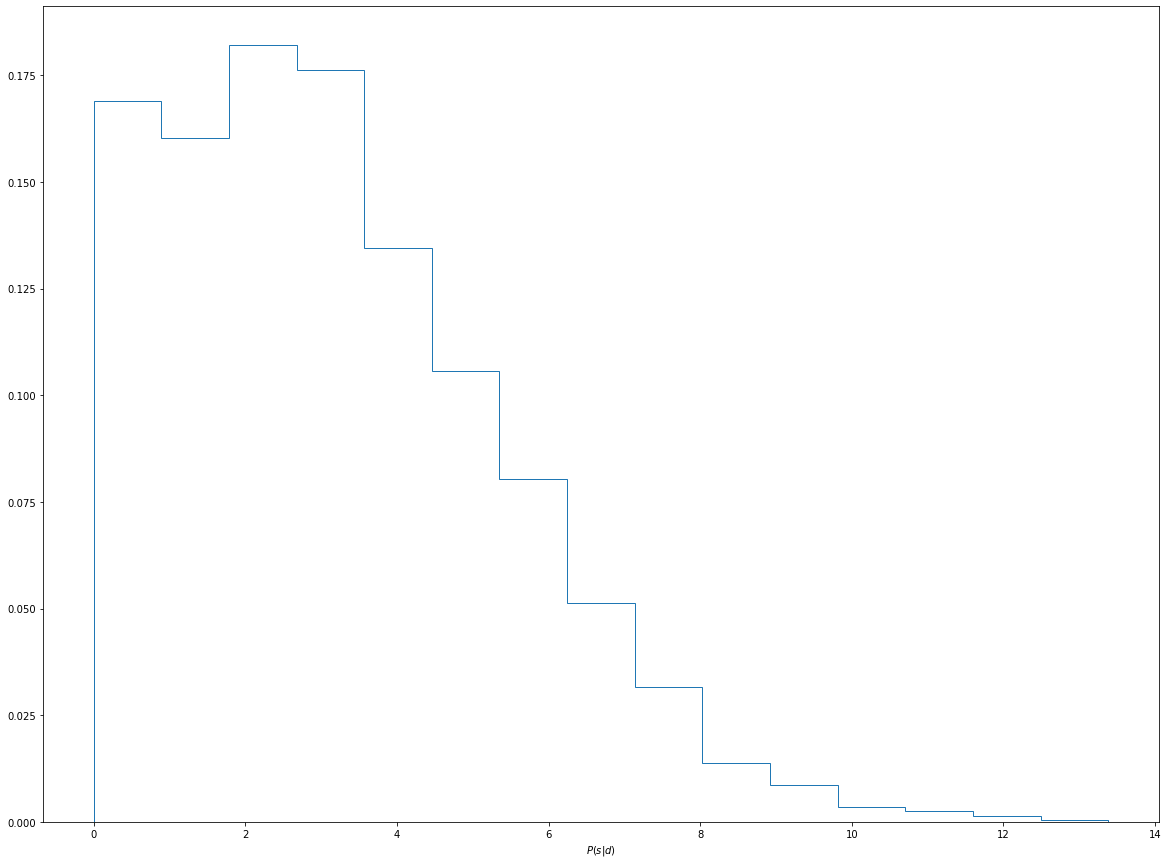

In [12]:
p_d = 10
p_s_d = [signal[x] for x in range(len(data)) if (abs(data_2[x] - 10)) < 0.05]
plt.hist(p_s_d, 15, density=True,histtype='step')
plt.xlabel('$P(s|d)$')
plt.show()

When plotting $P(s|d)$, we see that the changes made to the background inversely affect the probability distribution of the true signal, as it has been shifted negatively by ~8. The distribution cuts off at 0 as the true signal was only generated in a range from 0 to 20, so the abrupt cutoff is expected. The distribution is shifted negatively because we expect our background distribution to be shifted by a value of 8 ahead of the actual correlated true signal. As such, the true signal for a given data point would on average be 8 less than that data point.